Dataset preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Missing values in dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Training data shape: (105, 4)
Testing data shape: (45, 4)

1. Random Forest with default n_estimators (10):
Accuracy with default n_estimators (10): 1.0000

Classification Report (default n_estimators):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

    

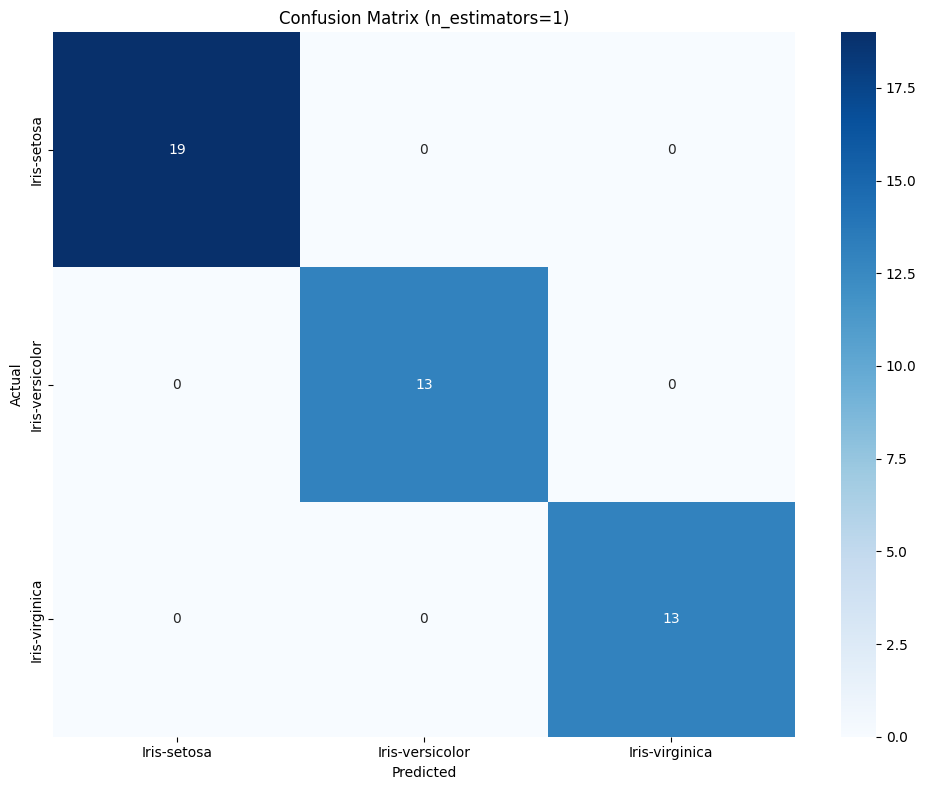

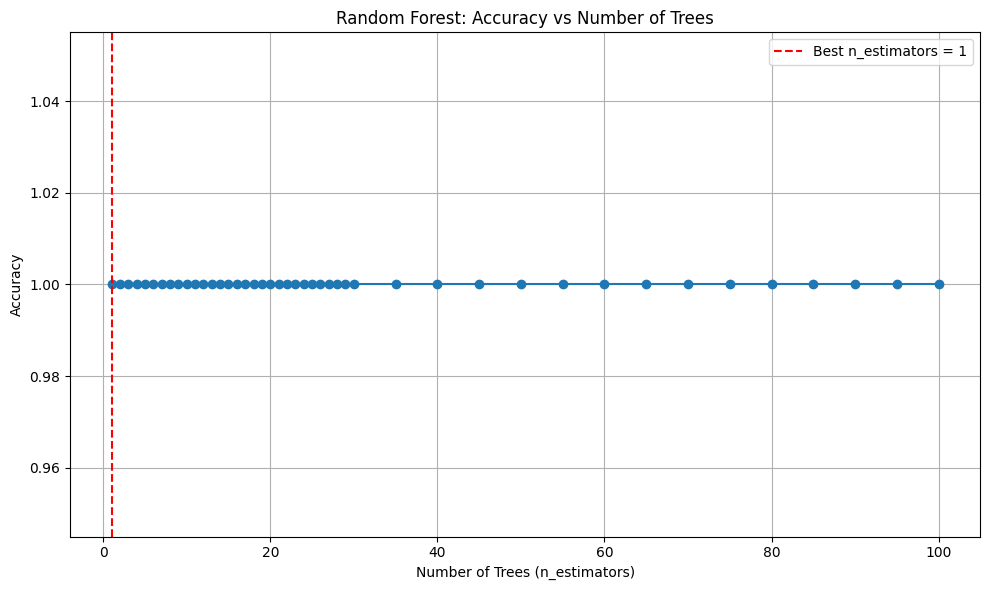

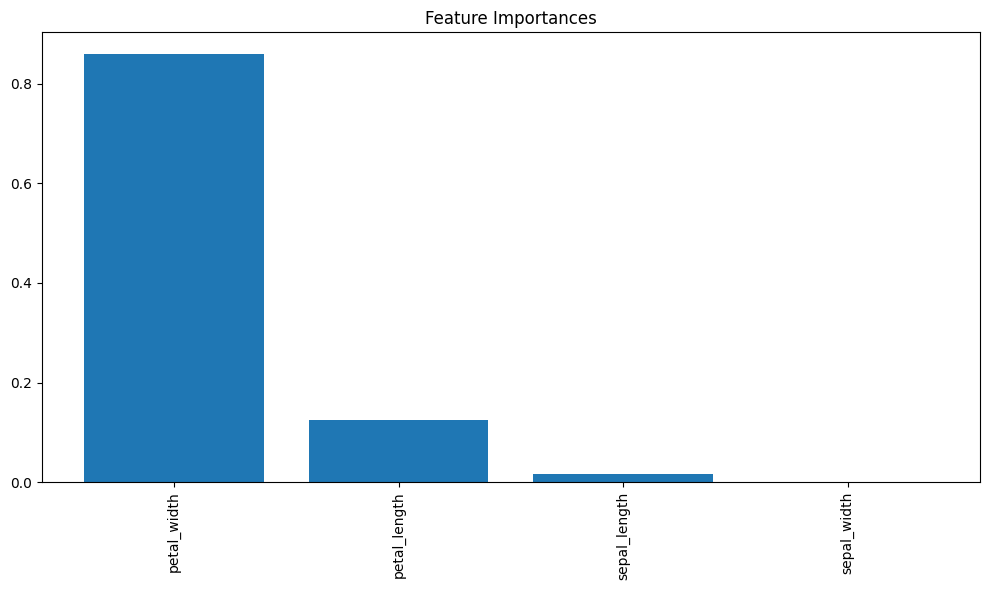


Feature Importances:
petal_width: 0.8607
petal_length: 0.1241
sepal_length: 0.0153
sepal_width: 0.0000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris_data = pd.read_csv('/content/iris (3).csv')

# Display the first few rows of the dataset
print("Dataset preview:")
print(iris_data.head())

# Check for any missing values
print("\nMissing values in dataset:")
print(iris_data.isnull().sum())

# Split the data into features and target
X = iris_data.drop('species', axis=1)  # Features
y = iris_data['species']  # Target

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# 1. Build Random Forest classifier with default n_estimators (10)
print("\n1. Random Forest with default n_estimators (10):")
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Make predictions
y_pred_default = rf_default.predict(X_test)

# Calculate accuracy
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators (10): {accuracy_default:.4f}")

# Display classification report
print("\nClassification Report (default n_estimators):")
print(classification_report(y_test, y_pred_default))

# 2. Fine-tune the model by changing the number of trees
print("\n2. Fine-tuning by changing number of trees:")

# Try different numbers of trees
n_estimators_range = list(range(1, 31)) + list(range(35, 101, 5))  # More granular testing for lower values
accuracies = []

for n_estimators in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(f"n_estimators = {n_estimators}, Accuracy = {accuracy_score(y_test, y_pred):.4f}")

# Find the best number of trees
best_n_estimators = n_estimators_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"\nBest accuracy: {best_accuracy:.4f} with n_estimators = {best_n_estimators}")

# Train the final model with the best number of trees
rf_best = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)

# Display classification report for the best model
print("\nClassification Report (best n_estimators):")
print(classification_report(y_test, y_pred_best))

# Calculate and display confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix for the best model:")
print(cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (n_estimators={best_n_estimators})')
plt.tight_layout()
plt.show()

# Plot the accuracy vs number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-')
plt.axvline(x=best_n_estimators, color='r', linestyle='--', label=f'Best n_estimators = {best_n_estimators}')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Number of Trees')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot feature importance for the best model
feature_importances = rf_best.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

print("\nFeature Importances:")
for i in indices:
    print(f"{features[i]}: {feature_importances[i]:.4f}")